In [40]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (4.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

In [41]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

#mendefinisikan variabel untuk dimasukkan -----------------------------------------------------
train_path = 'images/final/*.jpg'
addrs_train = glob.glob(train_path)

#meembuat fungsi untuk membaca tipe file berdata .jpg ---------------------------------------------------
def createFileList(myDir, format='.jpg'):
    fileList = []
    print("Scanning inside " + myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList


#load data gambar informasu lokasi yang diberikan 
myTrainList = createFileList('images/final/')

train_size = 414
test_size = 46
image_width = 270
image_height = 270

train_x_orig = []
#For each files in the folder, save the grayscale values
for i, file in enumerate(myTrainList):
    train_x_orig = np.append(train_x_orig, mpimg.imread(file))
    
#train_x_orig = train_x_orig.flatten()
train_x_orig = np.reshape(train_x_orig, (train_size, image_width, image_height, 3)).astype(int)
labels = [1 if 'b' in addr_train else 0 for addr_train in addrs_train]  # 0 = Normal, 1 = Banjir
train_labels = np.asarray(labels).astype(int)
train_y = np.array([train_labels][:]) # your train set labels
        
#Define where to look up the images -----------------------------------------------------
test_path = 'images/testsawah/*.jpg'
addrs_test = glob.glob(test_path)
    
#Define features and labels for test ----------------------------------------------------

#Load the original image
myTestList = createFileList('images/testsawah/')

test_x_orig = []
#For each files in the folder, save the grayscale values
for file in myTestList:
    test_x_orig = np.append(test_x_orig, mpimg.imread(file))
    
test_x_orig = np.reshape(test_x_orig, (test_size, image_width, image_height, 3)).astype(int)
labels = [1 if 'b' in addr_test else 0 for addr_test in addrs_test]  # 0 = Normal, 1 = Banjir
test_labels = np.asarray(labels).astype(int)
test_y = np.array([test_labels][:]) # your train set labels
        
classes = np.array([b'No Banjir', b'Banjir'], dtype=np.dtype('|S'))

print ("Done!")

Scanning inside images/final/
Scanning inside images/testsawah/
Done!


<module 'matplotlib.image' from '/anaconda3/lib/python3.7/site-packages/matplotlib/image.py'>

NameError: name 'imshow' is not defined

y = 1. It's a Banjir picture.


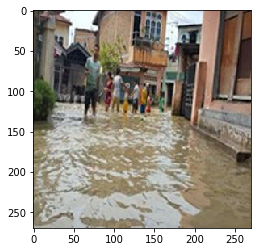

In [58]:
# contoh train
index = 1
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [46]:
# Explore dataset yang ditentukan
m_train = train_x_orig.shape[0] #jumlah gambar train
num_px = train_x_orig.shape[1] #ukuran image
m_test = test_x_orig.shape[0] #jumlah gambar test

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 414
Number of testing examples: 46
Each image is of size: (270, 270, 3)
train_x_orig shape: (414, 270, 270, 3)
train_y shape: (1, 414)
test_x_orig shape: (46, 270, 270, 3)
test_y shape: (1, 46)


In [33]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (218700, 414)
test_x's shape: (218700, 46)


## Architecture of the model

## Two-layer neural network

In [34]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 218700     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [35]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 80, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.7010537564304824
Cost after iteration 100: 0.04873383915917117
Cost after iteration 200: 0.01834927027096121
Cost after iteration 300: 0.010091300086553252
Cost after iteration 400: 0.0065500653845166875
Cost after iteration 500: 0.004694592616441301
Cost after iteration 600: 0.0035893270936164417
Cost after iteration 700: 0.0028698416835368787
Cost after iteration 800: 0.0023704544792832304
Cost after iteration 900: 0.002006763707915629
Cost after iteration 1000: 0.0017318640352421099
Cost after iteration 1100: 0.0015177631082372936
Cost after iteration 1200: 0.001346928201714091
Cost after iteration 1300: 0.0012078585459296594
Cost after iteration 1400: 0.0010927270769314859
Cost after iteration 1500: 0.0009960364681236033
Cost after iteration 1600: 0.0009138115338468905
Cost after iteration 1700: 0.0008431339482267375
Cost after iteration 1800: 0.0007818042372716266
Cost after iteration 1900: 0.0007281407387993917


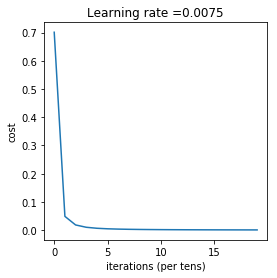

In [36]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2000, print_cost=True)

In [37]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [38]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.9782608695652173


## Test with your own image ##

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "No Banjir" picture.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


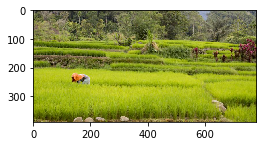

In [39]:
my_image = "testsawah.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [47]:
train_x_flatten

array([[ 12,  61, 205, ..., 103,  50,  14],
       [ 45,  42, 235, ..., 173,  46,   6],
       [ 36,  36, 235, ..., 232,  37,   4],
       ...,
       [ 15, 123, 142, ..., 166, 153, 223],
       [ 35, 108, 126, ..., 166, 129, 226],
       [ 26,  77, 126, ..., 154,  91, 231]])

In [48]:
train_x_orig


array([[[[ 12,  45,  36],
         [ 11,  42,  34],
         [ 13,  44,  36],
         ...,
         [210, 229, 113],
         [167, 186,  68],
         [184, 204,  81]],

        [[ 14,  47,  38],
         [ 20,  53,  44],
         [ 18,  49,  41],
         ...,
         [175, 194,  78],
         [164, 183,  65],
         [162, 182,  61]],

        [[ 22,  55,  46],
         [ 33,  66,  57],
         [ 17,  48,  40],
         ...,
         [145, 164,  49],
         [182, 201,  85],
         [105, 125,   4]],

        ...,

        [[ 16,  57,   1],
         [ 55,  98,  44],
         [ 21,  68,  13],
         ...,
         [  1,  20,  14],
         [  1,  20,  14],
         [  1,  21,  12]],

        [[ 65, 113,  53],
         [ 23,  71,  11],
         [ 36,  87,  28],
         ...,
         [  0,  17,  11],
         [  0,  16,  10],
         [  0,  18,   9]],

        [[ 57, 109,  45],
         [  6,  60,   0],
         [ 67, 123,  60],
         ...,
         [ 14,  33,  27],
        

In [49]:
train_y.shape

(1, 414)

In [50]:
train_x.shape

(218700, 414)

In [51]:
num_px

270

In [52]:
addrs_train

['images/final/t_36.jpg',
 'images/final/b_248.jpg',
 'images/final/b_32.jpg',
 'images/final/b_260.jpg',
 'images/final/b_274.jpg',
 'images/final/b_26.jpg',
 'images/final/b_300.jpg',
 'images/final/b_116.jpg',
 'images/final/b_102.jpg',
 'images/final/b_103.jpg',
 'images/final/b_117.jpg',
 'images/final/b_301.jpg',
 'images/final/b_275.jpg',
 'images/final/b_27.jpg',
 'images/final/b_33.jpg',
 'images/final/b_261.jpg',
 'images/final/b_249.jpg',
 'images/final/t_37.jpg',
 'images/final/t_35.jpg',
 'images/final/b_19.jpg',
 'images/final/b_25.jpg',
 'images/final/b_277.jpg',
 'images/final/b_263.jpg',
 'images/final/b_31.jpg',
 'images/final/b_288.jpg',
 'images/final/b_303.jpg',
 'images/final/b_129.jpg',
 'images/final/b_101.jpg',
 'images/final/b_115.jpg',
 'images/final/b_114.jpg',
 'images/final/b_100.jpg',
 'images/final/b_128.jpg',
 'images/final/b_302.jpg',
 'images/final/b_289.jpg',
 'images/final/b_262.jpg',
 'images/final/b_30.jpg',
 'images/final/b_24.jpg',
 'images/fina

In [54]:
myTrainList 

['images/final/t_36.jpg',
 'images/final/b_248.jpg',
 'images/final/b_32.jpg',
 'images/final/b_260.jpg',
 'images/final/b_274.jpg',
 'images/final/b_26.jpg',
 'images/final/b_300.jpg',
 'images/final/b_116.jpg',
 'images/final/b_102.jpg',
 'images/final/b_103.jpg',
 'images/final/b_117.jpg',
 'images/final/b_301.jpg',
 'images/final/b_275.jpg',
 'images/final/b_27.jpg',
 'images/final/b_33.jpg',
 'images/final/b_261.jpg',
 'images/final/b_249.jpg',
 'images/final/t_37.jpg',
 'images/final/t_35.jpg',
 'images/final/b_19.jpg',
 'images/final/b_25.jpg',
 'images/final/b_277.jpg',
 'images/final/b_263.jpg',
 'images/final/b_31.jpg',
 'images/final/b_288.jpg',
 'images/final/b_303.jpg',
 'images/final/b_129.jpg',
 'images/final/b_101.jpg',
 'images/final/b_115.jpg',
 'images/final/b_114.jpg',
 'images/final/b_100.jpg',
 'images/final/b_128.jpg',
 'images/final/b_302.jpg',
 'images/final/b_289.jpg',
 'images/final/b_262.jpg',
 'images/final/b_30.jpg',
 'images/final/b_24.jpg',
 'images/fina